In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Transmission de données

On souhaite transmettre **6 chiffres**, chacun codé sur **8 bits**, soit :

\[
6 \times 8 = 48 \text{ bits}
\]

La trame totale contient donc **48 bits**.


## Fréquence d'envoi

On veut envoyer la trame **2 fois par seconde**.

Cela signifie un envoi toutes les :

- <span style="color:#BF40BF;">0.5 seconde</span> (fréquence 2 Hz)

On a une trame de 48 bits, donc :

\[
\text{Intervalle par bit} = \frac{1}{2 \cdot 48} \approx 0.625\ \mathrm{sec/bit}
\]

On arrondit à :

- <span style="color:#1F51FF;">0.5 seconde par bit</span> (approximation en bleu néon)


In [9]:
def raised_cosine(T, beta, span, dt):
    """
    Génère un filtre Raised Cosine.
    
    T : période symbole (ex : 1)
    beta : roll-off (0 à 1)
    span : durée du filtre en nombre de symboles (ex : 6)
    dt : espacement entre les échantillons (sampling interval)
    """
    t = np.arange(-span*T/2, span*T/2, dt)
    h = np.zeros_like(t)

    for i, ti in enumerate(t):
        if abs(1 - (4 * beta * ti / T)**2) < 1e-10:
            # Cas limite pour éviter la division par zéro
            h[i] = beta / (2*T) * np.sin(np.pi/(2*beta))
        elif abs(ti) < 1e-10:
            # Valeur à t = 0
            h[i] = 1
        else:
            h[i] = (np.sin(np.pi * ti / T) / (np.pi * ti / T)) * \
                   (np.cos(np.pi * beta * ti / T) / (1 - (2 * beta * ti / T)**2))

    return t, h


\[
h(t) = 
\frac{\sin\!\left(\pi \frac{t}{T}\right)}{\pi \frac{t}{T}} \cdot
\frac{\cos\!\left(\pi \beta \frac{t}{T}\right)}{1 - \left(2 \beta \frac{t}{T}\right)^2}
\]

\[
\text{avec : } 
\begin{cases}
T & \text{: période symbole} \\
\beta & \text{: roll-off factor (0 à 1)} \\
t & \text{: temps}
\end{cases}
\]


In [7]:
#------------ CONSTANTES ------------

T = 0.5        # période 
beta = 0.25    # roll-off
span = 8       # dure 8 symboles
dt = T / 100   # espacement d'échantillonnage


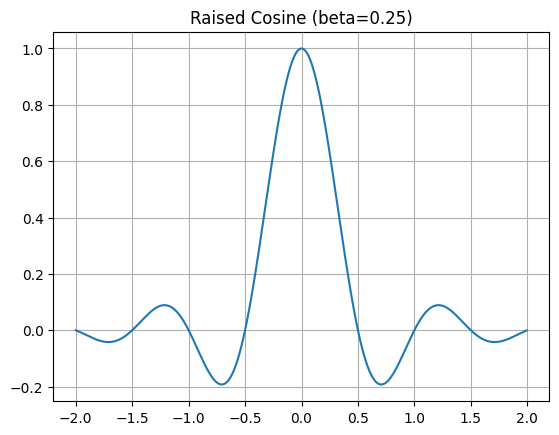

In [10]:
t, h = raised_cosine(T, beta, span, dt)

plt.plot(t, h)
plt.title("Raised Cosine (beta=0.25)")
plt.grid()
plt.show()